In [1]:
#modules to load saved models
from joblib import dump, load
from tensorflow.keras.models import load_model

#data preprocessing modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#regression metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from commons import mean_absolute_percentage_error #keep commons.py in notebooks folder

#classification metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

#modules for plots if required
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot 

Using TensorFlow backend.


# Regression

In [2]:
#file path
data=pd.read_csv('datasets/reg_ninety.csv',sep=',')

# 'datasets/reg_interval1.csv'
# 'datasets/reg_interval2.csv'
# 'datasets/reg_interval3.csv'
# 'datasets/reg_seven.csv'
# 'datasets/reg_thirty.csv'
# 'datasets/reg_ninety.csv'

In [3]:
#visualize the data
data.head(3)

,activeaddresses,difficulty,difficulty30mom,difficulty30rsi,difficulty90mom,hashrate90var,median_transaction_fee30trxUSD,median_transaction_feeUSD,mining_profitability,mining_profitability90rsi,...,price30wmaUSD,price3emaUSD,price3wmaUSD,price7smaUSD,price90wmaUSD,sentinusd90emaUSD,sentinusd90smaUSD,size90trx,transactionvalueUSD,priceUSD
0,75756,6695826.0,2327950.0,97.889,3716190.0,1.292548e+26,2.482,0.0474,7220.0,54.763,...,66.298,90.961,91.616,84.929,43.032,68391477,54550954,0.334,2592.0,124.662
1,91875,6695826.0,2327950.0,97.889,3716190.0,1.382186e+26,2.534,0.0539,7990.0,55.757,...,69.605,99.355,100.288,90.078,44.686,73007549,57359476,0.331,4400.0,111.049
2,107142,6695826.0,2327950.0,97.889,3716190.0,1.460025e+26,2.599,0.0600,8852.0,56.831,...,73.541,109.679,111.703,95.902,46.586,77645623,60260338,0.329,4478.0,102.694


In [4]:
#create train-test splits for ANN
length=data.shape[1]-1
X=data.iloc[:,:length]
y=data.iloc[:,length:]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True, random_state=7)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
estimators=[]
estimators.append(['minmax',MinMaxScaler()])
estimators.append(['robust',RobustScaler()])
scaling=Pipeline(estimators)
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

In [5]:
#load saved model
SANN=load_model('trained_models/SANN_reg_ninety.h5',compile=False)

# 'trained_models/SANN_reg_interval1.h5'
# 'trained_models/SANN_reg_interval2.h5'
# 'trained_models/SANN_reg_interval3.h5'
# 'trained_models/SANN_reg_seven.h5'
# 'trained_models/SANN_reg_thirty.h5'
# 'trained_models/SANN_reg_ninety.h5'

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
SANN.get_config()

{'name': 'model_2',
 'layers': [{'name': 'dense_19_input',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 20),
    'dtype': 'float32',
    'sparse': False,
    'name': 'dense_19_input'},
   'inbound_nodes': []},
  {'name': 'dense_22_input',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 20),
    'dtype': 'float32',
    'sparse': False,
    'name': 'dense_22_input'},
   'inbound_nodes': []},
  {'name': 'dense_25_input',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 20),
    'dtype': 'float32',
    'sparse': False,
    'name': 'dense_25_input'},
   'inbound_nodes': []},
  {'name': 'dense_28_input',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 20),
    'dtype': 'float32',
    'sparse': False,
    'name': 'dense_28_input'},
   'inbound_nodes': []},
  {'name': 'dense_31_input',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 20),
    'dtype': 'float32',
    'sp

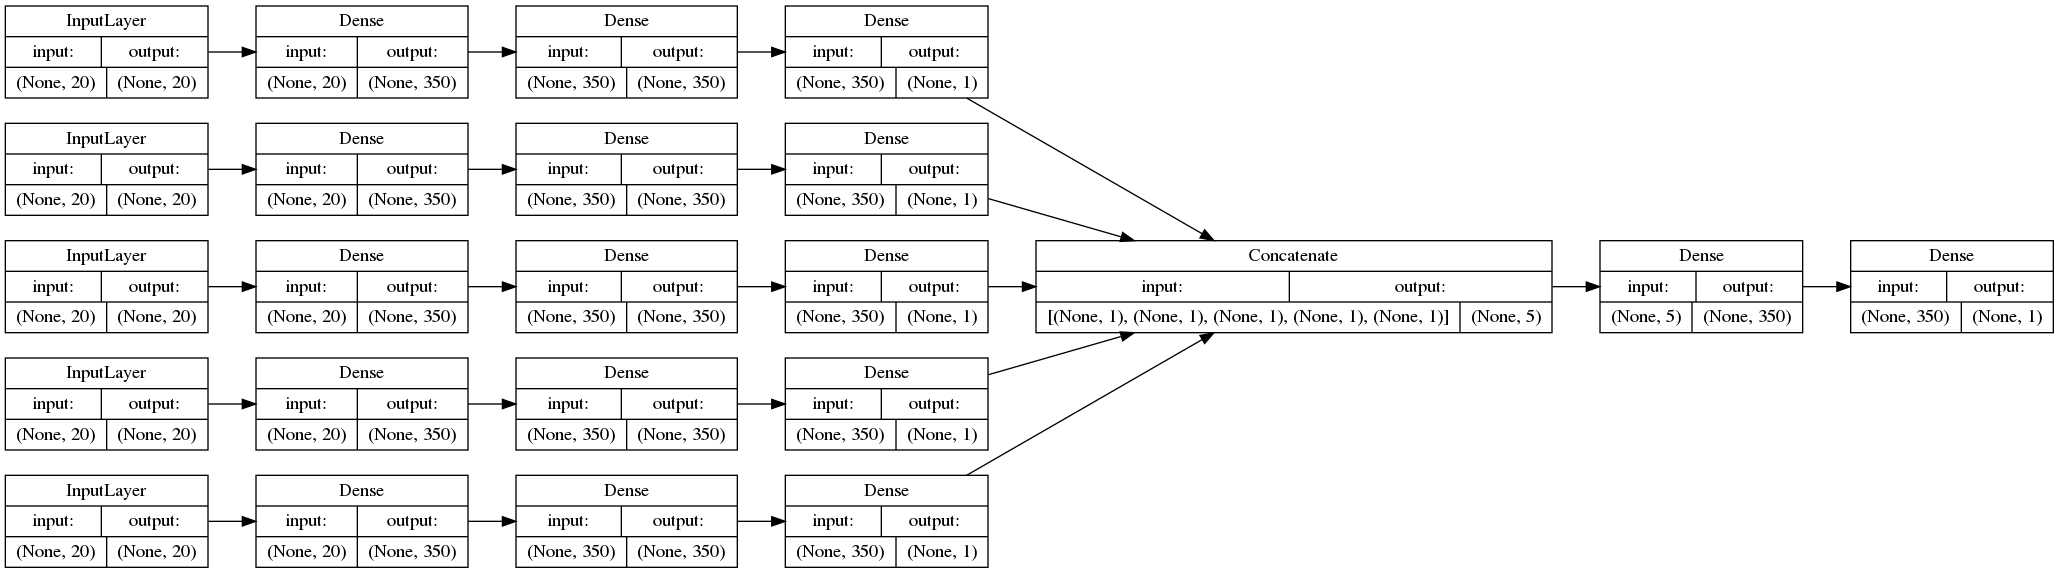

In [7]:
plot_model(SANN, show_layer_names=False, show_shapes=True, rankdir='LR')

In [8]:
# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X, verbose=1)

In [9]:
#make predictions
y_pred=predict_stacked_model(SANN,X_test)

449/449 [==============================] - 0s 152us/sample


In [10]:
y_pred=y_pred.ravel() #remove [] from y_pred

In [11]:
#show predictions in tabular format
combine=zip(y_test,y_pred)
pd.DataFrame(combine,columns=['y_test','y_pred'])

,y_test,y_pred
0,583.850,577.200317
1,615.988,652.661316
2,234.619,242.964630
3,5260.000,5306.803711
4,252.788,250.400589
5,379.647,381.373627
6,644.487,618.414734
7,7260.000,7508.652344
8,312.724,320.631104
9,3780.000,3636.404297


In [12]:
#calculate metrics
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=abs(r2_score(y_test, y_pred))

In [13]:
#show metrics in tabular format
metrics=[mae,mape,rmse,r2]
metrics_labels=['MAE','MAPE','RMSE','R^2']
pd.DataFrame(zip( metrics_labels,metrics))

,0,1
0,MAE,77.120134
1,MAPE,3.448211
2,RMSE,156.301759
3,R^2,0.997638


# Classification

In [14]:
#file path
data=pd.read_csv('datasets/cls_ninety.csv',sep=',')

# 'datasets/cls_interval1.csv'
# 'datasets/cls_interval2.csv'
# 'datasets/cls_interval3.csv'
# 'datasets/cls_seven.csv'
# 'datasets/cls_thirty.csv'
# 'datasets/cls_ninety.csv'

In [15]:
#visualize the data
data.head(3)

,activeaddresses,confirmationtime,difficulty,difficulty30ema,difficulty30mom,difficulty30roc,difficulty30sma,difficulty30trx,difficulty30var,difficulty3ema,...,price7rsiUSD,price90smaUSD,sentinusd90stdUSD,top100cap,top100cap30rsi,top100cap7roc,top100cap90rsi,transactions,transactionvalueUSD,category
0,75756,7.273,6695826.0,5385392.0,2327950.0,53.297,5182950.0,1.046,9.018789e+11,6690038.0,...,96.992,32.485,88825639,19.962,65.405,2.660,50.301,52572,2592.0,1
1,91875,7.956,6695826.0,5469936.0,2327950.0,53.297,5260549.0,1.085,9.500056e+11,6692932.0,...,98.201,33.536,100243842,20.024,66.711,2.207,50.893,63095,4400.0,1
2,107142,8.229,6695826.0,5549026.0,2327950.0,53.297,5338147.0,1.122,9.860894e+11,6694379.0,...,98.752,34.722,110663079,19.987,65.191,1.612,50.530,63766,4478.0,0


In [16]:
#create train-test splits for SVM
length=data.shape[1]-1
X=data.iloc[:,:length]
y=data.iloc[:,length:]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=False, random_state=7)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
estimators=[]
estimators.append(['robust',RobustScaler()])
estimators.append(['minmax',MinMaxScaler()])
scaling=Pipeline(estimators)
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

In [17]:
#load saved model
SANN=load_model('trained_models/SANN_cls_thirty.hdf5',compile=False)

# 'trained_models/SANN_cls_interval1.hdf5'
# 'trained_models/SANN_cls_interval2.hdf5'
# 'trained_models/SANN_cls_interval3.hdf5'
# 'trained_models/SANN_cls_seven.hdf5'
# 'trained_models/SANN_cls_thirty.hdf5'
# 'trained_models/SANN_cls_ninety.hdf5'

In [18]:
SANN.get_config()

{'name': 'model_1',
 'layers': [{'name': 'dense_1_input',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 39),
    'dtype': 'float32',
    'sparse': False,
    'name': 'dense_1_input'},
   'inbound_nodes': []},
  {'name': 'dense_4_input',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 39),
    'dtype': 'float32',
    'sparse': False,
    'name': 'dense_4_input'},
   'inbound_nodes': []},
  {'name': 'dense_7_input',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 39),
    'dtype': 'float32',
    'sparse': False,
    'name': 'dense_7_input'},
   'inbound_nodes': []},
  {'name': 'dense_10_input',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 39),
    'dtype': 'float32',
    'sparse': False,
    'name': 'dense_10_input'},
   'inbound_nodes': []},
  {'name': 'dense_13_input',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 39),
    'dtype': 'float32',
    'sparse':

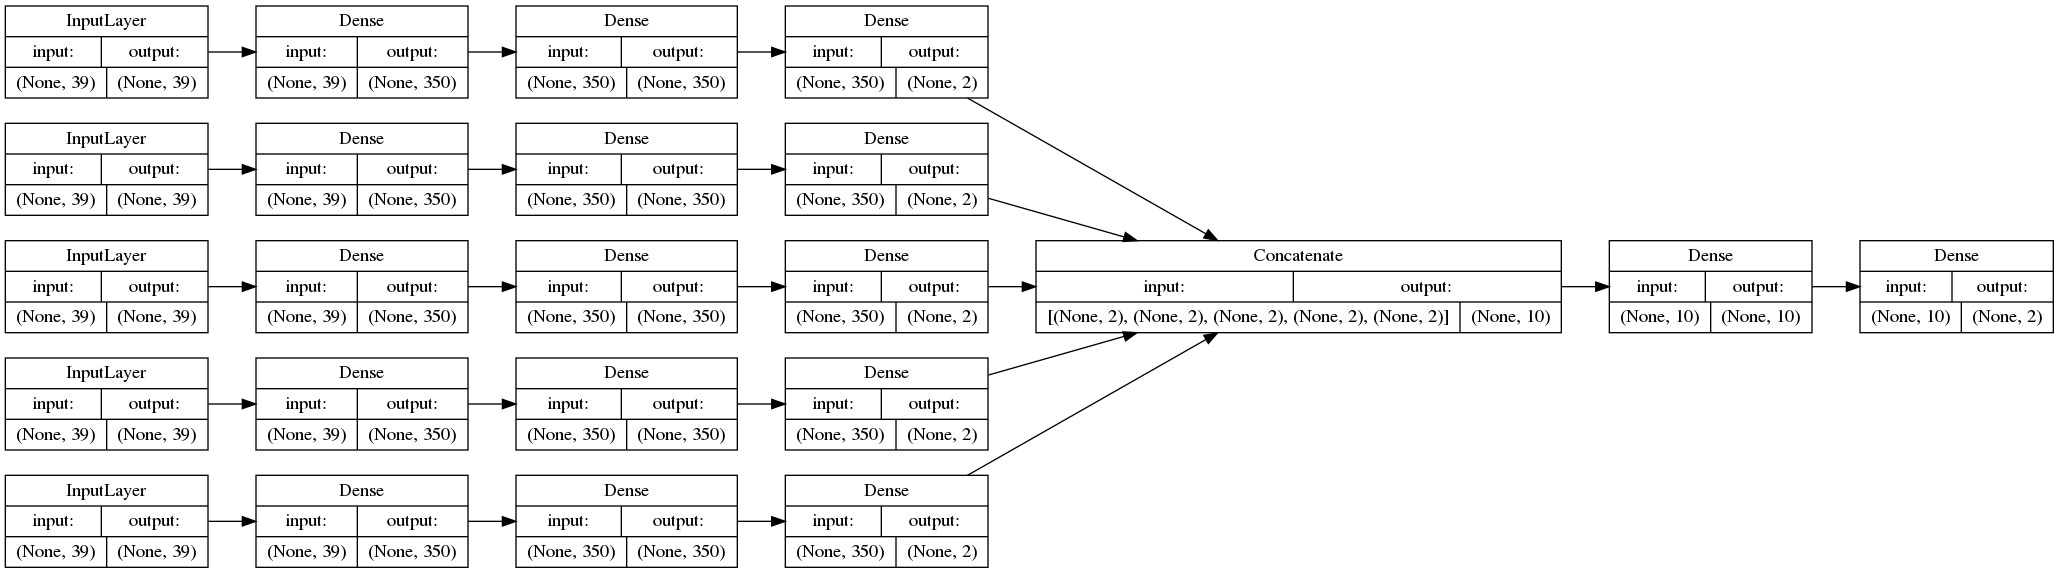

In [19]:
plot_model(SANN, show_layer_names=False, show_shapes=True, rankdir='LR')

In [20]:
# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X, verbose=1)

In [21]:
#make predictions
y_pred=predict_stacked_model(SANN,X_test)

494/494 [==============================] - 0s 166us/sample


In [22]:
y_pred=np.argmax(y_pred,axis=1)

In [23]:
#show predictions in tabular format
combine=zip(y_test,y_pred)
pd.DataFrame(combine,columns=['y_test','y_pred'])

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [26]:
#calculate metrics
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='binary') #try average='binary' or 'weighted' take higher
auc=roc_auc_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

In [27]:
#show metrics in tabular format
metrics=[accuracy, f1, auc, recall, precision]
metrics_labels=['Accuracy','F1-score','AUC','Recall','Precision']
pd.DataFrame(zip( metrics_labels,metrics))

,0,1
0,Accuracy,0.617409
1,F1-score,0.701422
2,AUC,0.607012
3,Recall,0.863813
4,Precision,0.590426
